# Assignment 1: Falling Body

Necessary libraries are imported

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Force on the body
Height dependent gravitational field and velocity dependent damping are present and therefore, the force is:
    $$F = - \frac{GMm}{(R+y)^2} + kv^2$$
and the acceleration, as a function of height and velocity, is:
    $$a = - \frac{GM}{(R+y)^2} + \frac{k}{m}v^2$$

In [4]:
#part a
#Euler Algorithm

#initialize constants
g = -9.81
k = 2*10**(-4)
G = 6.67*10**(-11)
M = 5.99*10**24
R = 6370*10**3
m = 1

#define acceleration function
def a(t,v,y):
    a = -G*M/(R+y)**2 + (k/m) * v**2
    return a

def euler(t_f,dt,y0):
    """
    Parameters
    """
    #initialize time step and an array with time points
    t0 = 0
    t = np.arange(t0,t_f+dt,dt)

    #initialize arrays for storing velocity and height
    v = np.zeros(len(t))
    v0 = 0
    v[0] = v0
    y = np.zeros(len(t))
    y[0] = y0

    #for loops for calculating velocity and height
    for i in range(len(t)-1):
        v[i+1] = v[i] + a(t[i],v[i],y[i]) * dt

    for i in range(len(t)-1):
        y[i+1] = y[i] + v[i] * dt
        if y[i+1] < 0:     #replace negative heights with 0
            y[i+1] = 0
    return t,v,y

In [5]:
euler?

## Validation of the code
To check the code gives the correct results, the outputs are plotted and compared with the analytical result for the case $a = g = 9.8 \, ms^{-2}$ which is:
$$y(t) = y_0 + v_0t - \frac{1}{2}gt^2$$

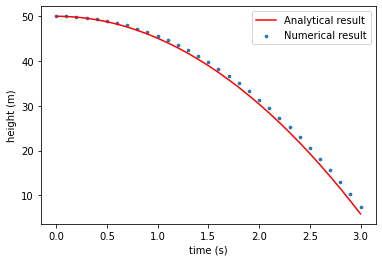

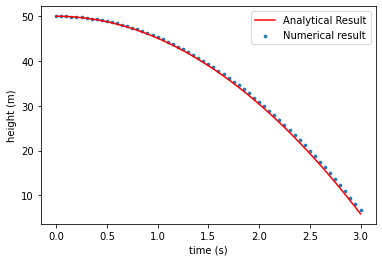

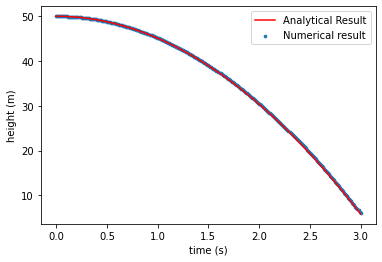

In [52]:
#part b

def a(t,v,y):
    g = -9.8
    return g
#numerical result using Euler algorithm
t_euler, v_euler, y_euler = euler(3,0.1,50)

t = np.arange(0,3+0.1,0.1)
v0 = 0
y0 = 50

#analytical result
y = y0 + v0*t - 0.5* 9.81* t**2

plt.figure()
plt.scatter(t_euler,y_euler,s=7,label='Numerical result')
plt.plot(t,y,color='r',label='Analytical result')
plt.xlabel('time (s)')
plt.ylabel('height (m)')
plt.legend()
plt.show()

#repeated with smaller step, i.e., dt = 0.05
t_euler, v_euler, y_euler = euler(3,0.05,50)

t = np.arange(0,3+0.05,0.05)
v0 = 0
y0 = 50

#analytical result
y = y0 + v0*t - 0.5* 9.81* t**2

plt.figure()
plt.scatter(t_euler,y_euler,s=7,label='Numerical result')
plt.plot(t,y,color='r',label='Analytical Result')
plt.xlabel('time (s)')
plt.ylabel('height (m)')
plt.legend()
plt.show()

#repeated with smaller step, i.e., dt = 0.01
t_euler, v_euler, y_euler = euler(3,0.01,50)

t = np.arange(0,3+0.01,0.01)
v0 = 0
y0 = 50

#analytical result
y = y0 + v0*t - 0.5* 9.81* t**2

plt.figure()
plt.scatter(t_euler,y_euler,s=7,label='Numerical result')
plt.plot(t,y,color='r',label='Analytical Result')
plt.xlabel('time (s)')
plt.ylabel('height (m)')
plt.legend()
plt.show()

## Part C

The function in part a is called to calculate velocity and height numerically, and the terminal velocity is calculated from
$$v_{terminal} = \sqrt{\frac{mg}{k}}$$
and is plotted on the same graph to validate the code.

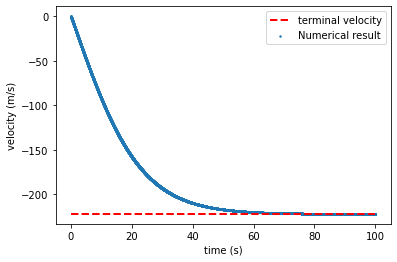

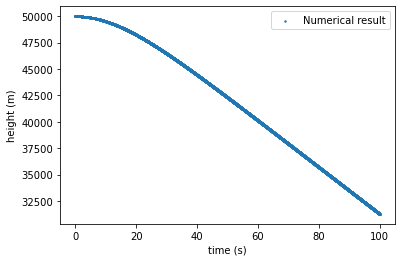

In [45]:
#part c

#define acceleration function
def a(t,v,y):
    a = -G*M/(R+y)**2 + (k/m) * v**2
    return a

#ball falling from 50,000 m
t_f = 100
dt = 0.01
y0 = 50000

t_euler,v_euler,y_euler = euler(t_f,dt,y0)
x = [0,t_f]
v_terminal = [-np.sqrt(m*g/k),-np.sqrt(m*g/k)]

plt.figure()
plt.scatter(t_euler,v_euler,s=2,label='Numerical result')
plt.plot(x,v_terminal,linestyle='dashed',linewidth=2,color='r',label='terminal velocity')
plt.xlabel('time (s)')
plt.ylabel('velocity (m/s)')
plt.legend()

plt.figure()
plt.scatter(t_euler,y_euler,s=2,label='Numerical result')
plt.xlabel('time (s)')
plt.ylabel('height (m)')
plt.legend()

Text(0, 0.5, 'height (m)')

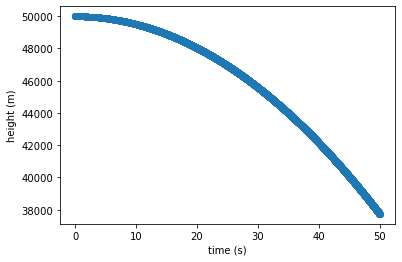

In [60]:
#part d

def euler_richardson(t_f,dt,y0):
    a = g
    t0 = 0
    t = np.arange(t0,t_f+dt,dt)
    t_mid = np.arange(t0+(0.5*dt),t_f+(0.5*dt),dt)

    v0 = 0
    v = np.zeros(len(t))
    v_mid = np.zeros(len(t_mid))
    y = np.zeros(len(t))
    v[0] = v0
    y[0] = y0

    for i in range(len(t)-1):
        v[i+1] = v[i] + a*dt

    for i in range(len(t_mid)):
        v_mid[i] = v[i] + 0.5*g*dt

    for i in range(len(t)-1):
        y[i+1] = y[i] + v_mid[i]*dt
        if y[i+1] < 0: y[i+1] = 0 
    return t,v,y

t,v,y = euler_richardson(50,0.01,50000)
plt.figure()
plt.scatter(t,y)
plt.xlabel('time (s)')
plt.ylabel('height (m)')